**Analisando correlação entre os atributos**

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


*Leitura do Arquivo*

In [202]:
#Leitura do arquivo
df = pd.read_pickle("df_filtrado.pickle")



In [203]:
df.head()

,AP_PRIPAL,AP_UFMUN,AP_CNSPCN,AP_NUIDADE,AP_SEXO,AP_RACACOR,AP_MUNPCN,AP_UFNACIO,AP_DTINIC,AP_DTFIM,AP_MOTSAI,AP_TRANSF,AP_CIDCAS,AP_CIDSEC,AQ_LINFIN,AQ_ESTADI,AQ_GRAHIS,AQ_TRANTE,AQ_CONTTR,AP_APACANT,ESQUEMA_TERAPEUTICO,NUMERO_DE_TRATAMENTOS_ANTERIORES,NUMERO_DE_DIAGNOSTICOS_DIFERENTES,TEM_CAUSAS_ASSOCIADAS,TEM_CAUSAS_SECUNDARIA,INICIO,ESTADIAMENTO_INICIO,FIM,ESTADIAMENTO_FIM,DIF_ESTADIAMENTO,TOTAL_TRATAMENTOS,PROCEDIMENTO_INICIAL,DESFECHO,CODIGO_6D,PACLITAXEL,DOXORRUBICINA,CICLOFOSFAMIDA,FLUOROURACILA,METOTREXATO,EPIRRUBICINA,DOCETAXEL,TRASTUZUMABE,TAMOXIFENO,CAPECITABINA,LETROZOL,ANASTROZOL,CARBOPLATINA,EXEMESTANO,FULVESTRANTO,VINORELBINA,GENCITABINA,GOSSERELINA,PAMIDRONATO,PERTUZUMABE,CISPLATINA,LEUPRORRELINA,ABREVIATURA_PROTOCOLO,Total_Medicamentos
918696,0304040029,SP,|{{~~ü|}|ä~{{{â,72,F,1,SP,Brasil,29/05/2009,31/07/2009,21,0,0000,C501,S,3,2,0,S,NaN,ADRIA,0,1,1,1,08/02/2012,0,29/05/2009,3,3,2,304040029,Piora,030404,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,DOX,1
1073812,0304040029,SP,|{{~~ü|}|ä~{{{â,72,F,1,SP,Brasil,10/11/2009,31/01/2010,21,0,0000,C501,S,3,3,0,S,NaN,PALIT,0,1,1,1,08/02/2012,0,29/05/2009,3,3,2,304040029,Piora,030404,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,PTX,1
397157,0304040029,ES,|{{~é{ââ|ü{{{Ç,70,F,3,ES,Brasil,15/06/2021,31/08/2021,21,0,0000,0000,S,3,GX,N,N,NaN,"CICLOFOSFAMIDA,",0,1,1,1,01/06/2023,2,22/02/2022,3,1,4,304040029,Piora,030404,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CFX,1
408520,0304040185,ES,|{{~é{ââ|ü{{{Ç,71,F,3,ES,Brasil,08/09/2021,30/11/2021,21,0,0000,0000,3,2,GX,S,N,NaN,"DOCETAXEL, TRAS",1,1,1,1,01/06/2023,2,22/02/2022,3,1,4,304040029,Piora,030404,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,DTX,1
13567415,0304040029,RJ,|{{|éâÇ{{{Ç,60,F,2,RJ,Brasil,01/07/2010,30/09/2010,21,0,0000,0000,S,3,G3,N,N,NaN,FAC,0,1,1,1,01/01/2012,3,07/10/2011,4,1,2,304020141,Piora,030404,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,DOX+CFX+5FU,3


In [204]:
df.columns

Index(['AP_PRIPAL', 'AP_UFMUN', 'AP_CNSPCN', 'AP_NUIDADE', 'AP_SEXO',
       'AP_RACACOR', 'AP_MUNPCN', 'AP_UFNACIO', 'AP_DTINIC', 'AP_DTFIM',
       'AP_MOTSAI', 'AP_TRANSF', 'AP_CIDCAS', 'AP_CIDSEC', 'AQ_LINFIN',
       'AQ_ESTADI', 'AQ_GRAHIS', 'AQ_TRANTE', 'AQ_CONTTR', 'AP_APACANT',
       'ESQUEMA_TERAPEUTICO', 'NUMERO_DE_TRATAMENTOS_ANTERIORES',
       'NUMERO_DE_DIAGNOSTICOS_DIFERENTES', 'TEM_CAUSAS_ASSOCIADAS',
       'TEM_CAUSAS_SECUNDARIA', 'INICIO', 'ESTADIAMENTO_INICIO', 'FIM',
       'ESTADIAMENTO_FIM', 'DIF_ESTADIAMENTO', 'TOTAL_TRATAMENTOS',
       'PROCEDIMENTO_INICIAL', 'DESFECHO', 'CODIGO_6D', 'PACLITAXEL',
       'DOXORRUBICINA', 'CICLOFOSFAMIDA', 'FLUOROURACILA', 'METOTREXATO',
       'EPIRRUBICINA', 'DOCETAXEL', 'TRASTUZUMABE', 'TAMOXIFENO',
       'CAPECITABINA', 'LETROZOL', 'ANASTROZOL', 'CARBOPLATINA', 'EXEMESTANO',
       'FULVESTRANTO', 'VINORELBINA', 'GENCITABINA', 'GOSSERELINA',
       'PAMIDRONATO', 'PERTUZUMABE', 'CISPLATINA', 'LEUPRORRELINA',
       'ABRE

*Convertendo campos de data para timestamp para poder fazer correlação*

In [205]:
# Convertendo a coluna de data para o tipo datetime
df['AP_DTINIC'] = pd.to_datetime(df['AP_DTINIC'], errors='coerce')
df['AP_DTFIM'] = pd.to_datetime(df['AP_DTFIM'], errors='coerce')
df['INICIO'] = pd.to_datetime(df['INICIO'], errors='coerce')
df['FIM'] = pd.to_datetime(df['FIM'], errors='coerce')



# Convertendo a data para um timestamp numérico
df['AP_DTINIC'] = df['AP_DTINIC'].apply(lambda x: x.timestamp() if pd.notnull(x) else None)
df['AP_DTFIM'] = df['AP_DTFIM'].apply(lambda x: x.timestamp() if pd.notnull(x) else None)
df['INICIO'] = df['INICIO'].apply(lambda x: x.timestamp() if pd.notnull(x) else None)
df['FIM'] = df['FIM'].apply(lambda x: x.timestamp() if pd.notnull(x) else None)




C:\Users\Rafaela\AppData\Local\Temp\ipykernel_1464\3041570925.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['AP_DTINIC'] = pd.to_datetime(df['AP_DTINIC'], errors='coerce')
C:\Users\Rafaela\AppData\Local\Temp\ipykernel_1464\3041570925.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['AP_DTFIM'] = pd.to_datetime(df['AP_DTFIM'], errors='coerce')
C:\Users\Rafaela\AppData\Local\Temp\ipykernel_1464\3041570925.py:5: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['FIM'] = pd.to_datetime(df['FIM'], errors='coerce')


*Trasnformando Variável Categórica em Numérica*

In [206]:
import numpy as np

df_analise = df

def valor_desfecho(desfecho):
    if(desfecho=='Alta'):
        return 0
    elif(desfecho=='Melhora'):
        return 1
    elif(desfecho=='Piora'):
        return 2
    elif(desfecho=='Óbito'):
        return 3
    else:
        return 4


df_analise['VALOR_DESFECHO'] = np.vectorize(valor_desfecho)(df_analise['DESFECHO'])
df_analise['VALOR_DESFECHO'].value_counts()
df_analise_valor = df_analise.drop('DESFECHO', axis=1)

*Usando One-Hot Encoding nas colunas de Localidade*

In [207]:
# Usando pd.get_dummies para fazer One-Hot Encoding
df_analise = pd.get_dummies(df_analise, columns=['AP_MUNPCN', 'AP_UFMUN'], drop_first=False)

# Verificando se existem NaN nas colunas de One-Hot Encoding
print(df_analise.isna().sum())

# Preenchendo NaN com 0 antes de converter para inteiro
df_analise.fillna(0, inplace=True)

# Lista das colunas criadas pelo One-Hot Encoding
one_hot_columns = [
    'AP_MUNPCN_AC', 'AP_MUNPCN_AL', 'AP_MUNPCN_AP', 'AP_MUNPCN_BA', 'AP_MUNPCN_CE', 
    'AP_MUNPCN_DF', 'AP_MUNPCN_ES', 'AP_MUNPCN_MA', 'AP_MUNPCN_MG', 'AP_MUNPCN_MS', 
    'AP_MUNPCN_MT', 'AP_MUNPCN_PA', 'AP_MUNPCN_PB', 'AP_MUNPCN_PE', 'AP_MUNPCN_PI', 
    'AP_MUNPCN_PR', 'AP_MUNPCN_RJ', 'AP_MUNPCN_RN', 'AP_MUNPCN_RO', 'AP_MUNPCN_RS', 
    'AP_MUNPCN_SC', 'AP_MUNPCN_SE', 'AP_MUNPCN_SP', 'AP_MUNPCN_TO', 'AP_UFMUN_ES', 
    'AP_UFMUN_MG', 'AP_UFMUN_RJ', 'AP_UFMUN_SP'
]

# Convertendo as colunas One-Hot Encoding para inteiros
df_analise[one_hot_columns] = df_analise[one_hot_columns].astype(int)

# Mostrando o DataFrame resultante
print(df_analise)


AP_PRIPAL       0
AP_CNSPCN       0
AP_NUIDADE      0
AP_SEXO         0
AP_RACACOR      0
               ..
AP_MUNPCN_TO    0
AP_UFMUN_ES     0
AP_UFMUN_MG     0
AP_UFMUN_RJ     0
AP_UFMUN_SP     0
Length: 85, dtype: int64
           AP_PRIPAL        AP_CNSPCN  AP_NUIDADE AP_SEXO  AP_RACACOR  \
918696    0304040029  |{{~~ü|}|ä~{{{â          72       F           1   
1073812   0304040029  |{{~~ü|}|ä~{{{â          72       F           1   
397157    0304040029  |{{~é{ââ|ü{{{Ç          70       F           3   
408520    0304040185  |{{~é{ââ|ü{{{Ç          71       F           3   
13567415  0304040029  |{{|éâÇ{{{Ç          60       F           2   
...              ...              ...         ...     ...         ...   
14043298  0304040029  é{üü{äÇ|üä}â|{          44       F           1   
14073573  0304040029  é{üü{äÇ|üä}â|{          44       F           1   
5341562   0304040029  é{üü{äÇâü~ÇÇ|{          38       F           2   
6142175   0304040029  é{üü{üÇâéé|{          

In [199]:
# Verificando os valores únicos na coluna 'PROCEDIMENTO_INICIAL'
valores_unicos = df_analise['AP_PRIPAL'].unique()
print(f'Valores únicos na coluna AP_PRIPAL: {valores_unicos}')

Valores únicos na coluna AP_PRIPAL: ['0304040029' '0304040185' '0304040037' '0304040193' '0304040010'
 '0304040142' '0304040088' '0304040045' '0304040150' '0304040070']


In [208]:
# Certifique-se de que as colunas estão corretamente selecionadas
df_encoded = pd.get_dummies(df_analise['AP_PRIPAL'], prefix='AP_PRIPAL', drop_first=False)

# Concatenando as novas colunas com o DataFrame original
df_analise = pd.concat([df_analise, df_encoded], axis=1)

# Exibindo o resultado
print(df_analise)


           AP_PRIPAL        AP_CNSPCN  AP_NUIDADE AP_SEXO  AP_RACACOR  \
918696    0304040029  |{{~~ü|}|ä~{{{â          72       F           1   
1073812   0304040029  |{{~~ü|}|ä~{{{â          72       F           1   
397157    0304040029  |{{~é{ââ|ü{{{Ç          70       F           3   
408520    0304040185  |{{~é{ââ|ü{{{Ç          71       F           3   
13567415  0304040029  |{{|éâÇ{{{Ç          60       F           2   
...              ...              ...         ...     ...         ...   
14043298  0304040029  é{üü{äÇ|üä}â|{          44       F           1   
14073573  0304040029  é{üü{äÇ|üä}â|{          44       F           1   
5341562   0304040029  é{üü{äÇâü~ÇÇ|{          38       F           2   
6142175   0304040029  é{üü{üÇâéé|{          46       F           1   
408788    0304040029  é{üü{üÇü}üééä|{          36       F           3   

         AP_UFNACIO     AP_DTINIC      AP_DTFIM  AP_MOTSAI  AP_TRANSF  \
918696       Brasil  1.243555e+09  1.248998e+09   

In [209]:
# Certifique-se de que as colunas estão corretamente selecionadas
df_encoded = pd.get_dummies(df_analise['PROCEDIMENTO_INICIAL'], prefix='PROCEDIMENTO_INICIAL')

# Concatenando as novas colunas com o DataFrame original
df_analise = pd.concat([df_analise, df_encoded], axis=1)

# Exibindo o resultado
print(df_analise)


           AP_PRIPAL        AP_CNSPCN  AP_NUIDADE AP_SEXO  AP_RACACOR  \
918696    0304040029  |{{~~ü|}|ä~{{{â          72       F           1   
1073812   0304040029  |{{~~ü|}|ä~{{{â          72       F           1   
397157    0304040029  |{{~é{ââ|ü{{{Ç          70       F           3   
408520    0304040185  |{{~é{ââ|ü{{{Ç          71       F           3   
13567415  0304040029  |{{|éâÇ{{{Ç          60       F           2   
...              ...              ...         ...     ...         ...   
14043298  0304040029  é{üü{äÇ|üä}â|{          44       F           1   
14073573  0304040029  é{üü{äÇ|üä}â|{          44       F           1   
5341562   0304040029  é{üü{äÇâü~ÇÇ|{          38       F           2   
6142175   0304040029  é{üü{üÇâéé|{          46       F           1   
408788    0304040029  é{üü{üÇü}üééä|{          36       F           3   

         AP_UFNACIO     AP_DTINIC      AP_DTFIM  AP_MOTSAI  AP_TRANSF  \
918696       Brasil  1.243555e+09  1.248998e+09   

*Transformando colunas em numéricas*

In [210]:
# Caso haja mais colunas, aplique a transformação a elas
colunas_categoricas = ['AQ_CONTTR', 'AQ_LINFIN', 'AQ_TRANTE']  # Colunas com valores 'S' e 'N'
for col in colunas_categoricas:
    df_analise[col] = df_analise[col].replace({'S': 1, 'N': 0})




C:\Users\Rafaela\AppData\Local\Temp\ipykernel_1464\2655021700.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_analise[col] = df_analise[col].replace({'S': 1, 'N': 0})


In [211]:
df_analise.columns

Index(['AP_PRIPAL', 'AP_CNSPCN', 'AP_NUIDADE', 'AP_SEXO', 'AP_RACACOR',
       'AP_UFNACIO', 'AP_DTINIC', 'AP_DTFIM', 'AP_MOTSAI', 'AP_TRANSF',
       ...
       'PROCEDIMENTO_INICIAL_304020435', 'PROCEDIMENTO_INICIAL_304020443',
       'PROCEDIMENTO_INICIAL_304040010', 'PROCEDIMENTO_INICIAL_304040029',
       'PROCEDIMENTO_INICIAL_304040037', 'PROCEDIMENTO_INICIAL_304040045',
       'PROCEDIMENTO_INICIAL_304040070', 'PROCEDIMENTO_INICIAL_304040142',
       'PROCEDIMENTO_INICIAL_304040185', 'PROCEDIMENTO_INICIAL_304040193'],
      dtype='object', length=112)

In [212]:
# Usar to_string para evitar truncamento na visualização
print(df_analise.iloc[0].to_string())


AP_PRIPAL                                 0304040029
AP_CNSPCN                            |{{~~ü|}|ä~{{{â
AP_NUIDADE                                        72
AP_SEXO                                            F
AP_RACACOR                                         1
AP_UFNACIO                                    Brasil
AP_DTINIC                               1243555200.0
AP_DTFIM                                1248998400.0
AP_MOTSAI                                         21
AP_TRANSF                                          0
AP_CIDCAS                                       0000
AP_CIDSEC                                       C501
AQ_LINFIN                                          1
AQ_ESTADI                                          3
AQ_GRAHIS                                          2
AQ_TRANTE                                          0
AQ_CONTTR                                          1
AP_APACANT                                         0
ESQUEMA_TERAPEUTICO                           

In [214]:
df_analise.dtypes

AP_PRIPAL                         object
AP_CNSPCN                         object
AP_NUIDADE                         int64
AP_SEXO                           object
AP_RACACOR                         int64
                                   ...  
PROCEDIMENTO_INICIAL_304040045      bool
PROCEDIMENTO_INICIAL_304040070      bool
PROCEDIMENTO_INICIAL_304040142      bool
PROCEDIMENTO_INICIAL_304040185      bool
PROCEDIMENTO_INICIAL_304040193      bool
Length: 112, dtype: object

**Remoção de Atributos Altamente Correlacionados (evitar redundância)**

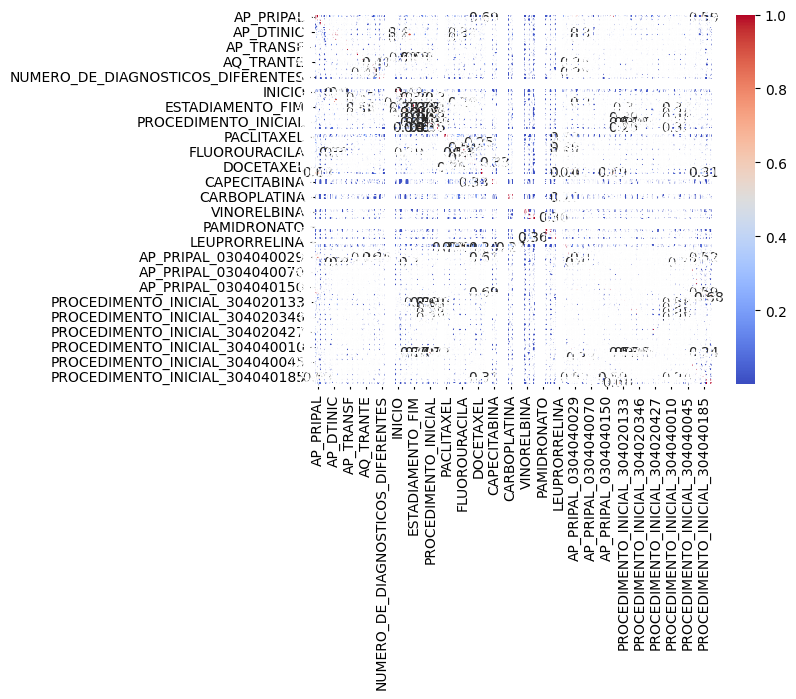

Index(['AP_PRIPAL', 'AP_NUIDADE', 'AP_RACACOR', 'AP_DTINIC', 'AP_MOTSAI',
       'AP_TRANSF', 'AQ_LINFIN', 'AQ_ESTADI', 'AQ_TRANTE', 'AQ_CONTTR',
       'NUMERO_DE_TRATAMENTOS_ANTERIORES', 'NUMERO_DE_DIAGNOSTICOS_DIFERENTES',
       'TEM_CAUSAS_ASSOCIADAS', 'TEM_CAUSAS_SECUNDARIA', 'INICIO',
       'ESTADIAMENTO_INICIO', 'ESTADIAMENTO_FIM', 'DIF_ESTADIAMENTO',
       'TOTAL_TRATAMENTOS', 'PROCEDIMENTO_INICIAL', 'VALOR_DESFECHO',
       'CODIGO_6D', 'PACLITAXEL', 'DOXORRUBICINA', 'CICLOFOSFAMIDA',
       'FLUOROURACILA', 'METOTREXATO', 'EPIRRUBICINA', 'DOCETAXEL',
       'TRASTUZUMABE', 'TAMOXIFENO', 'CAPECITABINA', 'LETROZOL', 'ANASTROZOL',
       'CARBOPLATINA', 'EXEMESTANO', 'FULVESTRANTO', 'VINORELBINA',
       'GENCITABINA', 'GOSSERELINA', 'PAMIDRONATO', 'PERTUZUMABE',
       'CISPLATINA', 'LEUPRORRELINA', 'Total_Medicamentos',
       'AP_PRIPAL_0304040010', 'AP_PRIPAL_0304040037', 'AP_PRIPAL_0304040045',
       'AP_PRIPAL_0304040070', 'AP_PRIPAL_0304040088', 'AP_PRIPAL_0304040142'

In [215]:
df_matrix_clinica = df_analise[['AP_PRIPAL', 'AP_NUIDADE',
       'AP_RACACOR', 'AP_DTINIC', 'AP_DTFIM',
       'AP_MOTSAI', 'AP_TRANSF', 'AQ_LINFIN',
       'AQ_ESTADI', 'AQ_TRANTE', 'AQ_CONTTR','NUMERO_DE_TRATAMENTOS_ANTERIORES',
       'NUMERO_DE_DIAGNOSTICOS_DIFERENTES', 'TEM_CAUSAS_ASSOCIADAS',
       'TEM_CAUSAS_SECUNDARIA', 'INICIO', 'ESTADIAMENTO_INICIO', 'FIM',
       'ESTADIAMENTO_FIM', 'DIF_ESTADIAMENTO', 'TOTAL_TRATAMENTOS',
       'PROCEDIMENTO_INICIAL', 'VALOR_DESFECHO', 'CODIGO_6D', 'PACLITAXEL',
       'DOXORRUBICINA', 'CICLOFOSFAMIDA', 'FLUOROURACILA', 'METOTREXATO',
       'EPIRRUBICINA', 'DOCETAXEL', 'TRASTUZUMABE', 'TAMOXIFENO',
       'CAPECITABINA', 'LETROZOL', 'ANASTROZOL', 'CARBOPLATINA', 'EXEMESTANO',
       'FULVESTRANTO', 'VINORELBINA', 'GENCITABINA', 'GOSSERELINA',
       'PAMIDRONATO', 'PERTUZUMABE', 'CISPLATINA', 'LEUPRORRELINA', 'Total_Medicamentos', 'AP_PRIPAL_0304040010',
       'AP_PRIPAL_0304040029', 'AP_PRIPAL_0304040037', 'AP_PRIPAL_0304040045','AP_PRIPAL_0304040070',
       'AP_PRIPAL_0304040088','AP_PRIPAL_0304040142','AP_PRIPAL_0304040150','AP_PRIPAL_0304040185',
       'AP_PRIPAL_0304040193', 'PROCEDIMENTO_INICIAL_304020133','PROCEDIMENTO_INICIAL_304020141',
       'PROCEDIMENTO_INICIAL_304020338','PROCEDIMENTO_INICIAL_304020346','PROCEDIMENTO_INICIAL_304020354',
       'PROCEDIMENTO_INICIAL_304020419','PROCEDIMENTO_INICIAL_304020427','PROCEDIMENTO_INICIAL_304020435',
       'PROCEDIMENTO_INICIAL_304020443','PROCEDIMENTO_INICIAL_304040010','PROCEDIMENTO_INICIAL_304040029',
       'PROCEDIMENTO_INICIAL_304040037','PROCEDIMENTO_INICIAL_304040045','PROCEDIMENTO_INICIAL_304040070',
       'PROCEDIMENTO_INICIAL_304040142','PROCEDIMENTO_INICIAL_304040185','PROCEDIMENTO_INICIAL_304040193',]]


# Calcular a matriz de correlação
corr_matrix = df_matrix_clinica.corr().abs()

# Criar uma máscara para identificar os pares altamente correlacionados (correlação > 0.8)
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Encontrar colunas com correlação maior que 0.8
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]

# Remover as colunas altamente correlacionadas
df_matrix_clinica = df_matrix_clinica.drop(columns=to_drop)

# Exibir a matriz de correlação para ver os resultados
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

df_matrix_clinica.columns

In [ ]:
df_matrix_clinica = df_matrix_clinica.drop(['AP_PRIPAL', 'PROCEDIMENTO_INICIAL', 'AP_DTINIC'], axis=1)
print(df_matrix_clinica.dtypes)



AP_NUIDADE                        int64
AP_RACACOR                        int64
AP_MOTSAI                         int64
AP_TRANSF                         int64
AQ_LINFIN                         int32
                                  ...  
PROCEDIMENTO_INICIAL_304020435     bool
PROCEDIMENTO_INICIAL_304020443     bool
PROCEDIMENTO_INICIAL_304040037     bool
PROCEDIMENTO_INICIAL_304040185     bool
PROCEDIMENTO_INICIAL_304040193     bool
Length: 62, dtype: object


*Transformando colunas em tipo inteiro*

In [ ]:
df_matrix_clinica['AQ_LINFIN'] = pd.to_numeric(df_matrix_clinica['AQ_LINFIN'], errors='coerce')
df_matrix_clinica['AQ_TRANTE'] = pd.to_numeric(df_matrix_clinica['AQ_TRANTE'], errors='coerce')
df_matrix_clinica['CODIGO_6D'] = pd.to_numeric(df_matrix_clinica['CODIGO_6D'], errors='coerce')

# Converter para inteiro
df_matrix_clinica['AQ_LINFIN'] = df_matrix_clinica['AQ_LINFIN'].astype('int')
df_matrix_clinica['AQ_TRANTE'] = df_matrix_clinica['AQ_TRANTE'].astype('int')
df_matrix_clinica['CODIGO_6D'] = df_matrix_clinica['CODIGO_6D'].astype('int')

df_matrix_clinica.fillna(0, inplace=True)  # Preencher NaN com 0, ou use outro valor se necessário


**Removendo colunas com baixa variabilidade (constantes ou quase constantes)**

In [221]:

# Remover colunas com baixa variabilidade (aqui, variabilidade abaixo de 0.01)
df_cleaned = df_matrix_clinica.loc[:, df_matrix_clinica.var() > 0.01]

print(df_cleaned)

          AP_NUIDADE  AP_RACACOR  AP_MOTSAI  AQ_LINFIN  AQ_ESTADI  AQ_TRANTE  \
918696            72           1         21          1          3          0   
1073812           72           1         21          1          3          0   
397157            70           3         21          1          3          0   
408520            71           3         21          3          2          1   
13567415          60           2         21          1          3          0   
...              ...         ...        ...        ...        ...        ...   
14043298          44           1         21          0          3          0   
14073573          44           1         21          0          3          0   
5341562           38           2         21          0          3          0   
6142175           46           1         21          0          3          0   
408788            36           3         21          1          3          0   

          AQ_CONTTR  NUMERO_DE_TRATAMEN

In [222]:
# Usar to_string para evitar truncamento na visualização
print(df_cleaned.iloc[0].to_string())

AP_NUIDADE                                    72
AP_RACACOR                                     1
AP_MOTSAI                                     21
AQ_LINFIN                                      1
AQ_ESTADI                                      3
AQ_TRANTE                                      0
AQ_CONTTR                                      1
NUMERO_DE_TRATAMENTOS_ANTERIORES               0
INICIO                              1343865600.0
ESTADIAMENTO_INICIO                            0
ESTADIAMENTO_FIM                               3
DIF_ESTADIAMENTO                               3
TOTAL_TRATAMENTOS                              2
VALOR_DESFECHO                                 2
PACLITAXEL                                     0
DOXORRUBICINA                                  1
CICLOFOSFAMIDA                                 0
FLUOROURACILA                                  0
DOCETAXEL                                      0
TRASTUZUMABE                                   0
CARBOPLATINA        

*Matriz de Correlação*

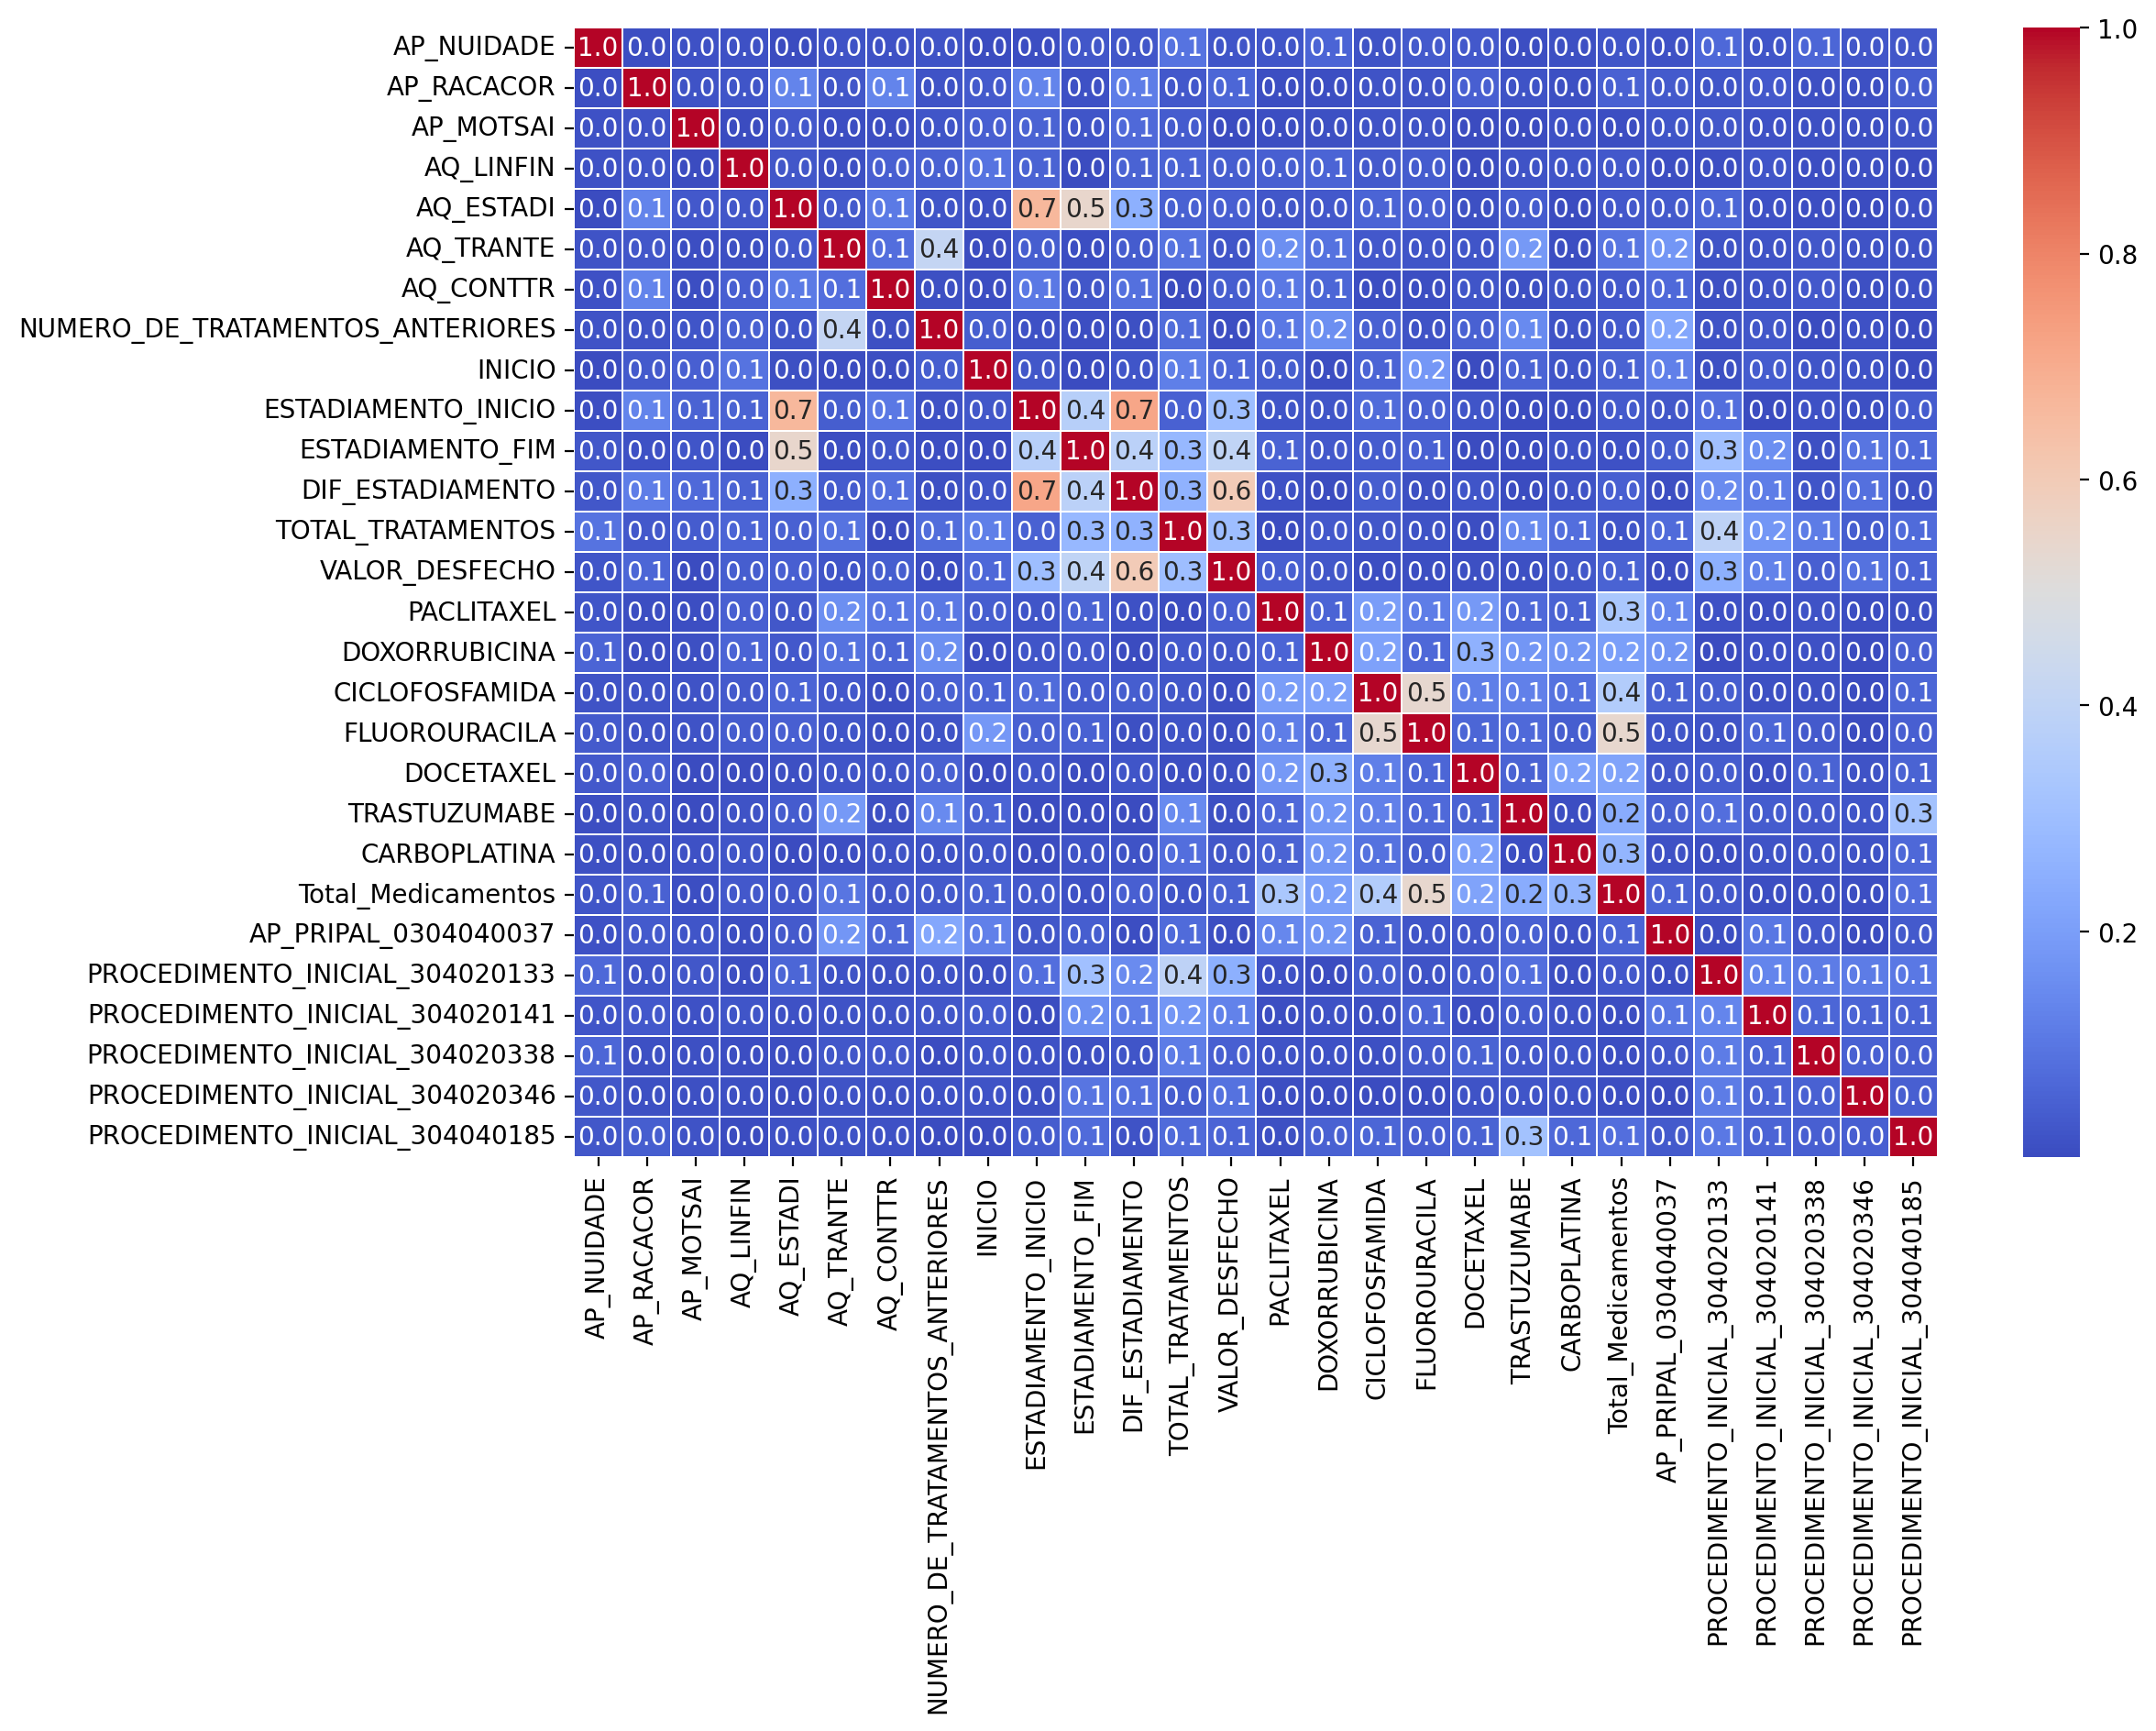

In [223]:

# Calcular a matriz de correlação
corr_matrix = df_cleaned.corr().abs()
plt.figure(figsize=(12,8),dpi=200)

# Exibir a matriz de correlação para ver os resultados
sns.heatmap(corr_matrix, annot=True, fmt=".1f", linewidths=.6, cmap='coolwarm')

plt.show()


**PCA (Análise de Componentes Principais) Reduz a dimensionalidade mantendo a maior variabilidade**

Variância explicada por cada componente: [0.09262109 0.0827772  0.07063904 0.0696323  0.05352749 0.04977663
 0.04347673 0.04173711 0.04043247 0.03947213]
Total de variância explicada: 0.5840921999641202


<Figure size 1200x800 with 0 Axes>

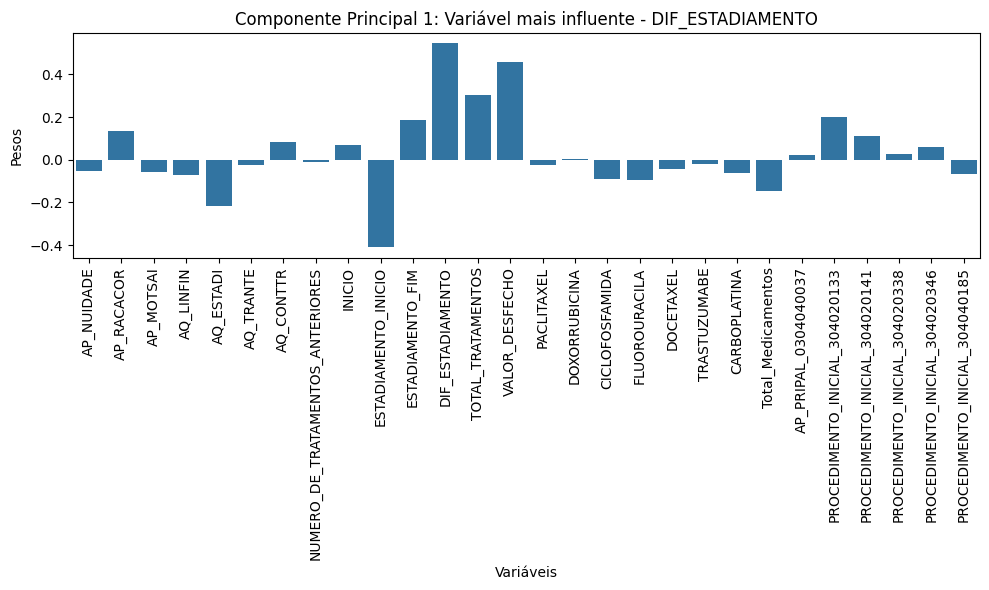

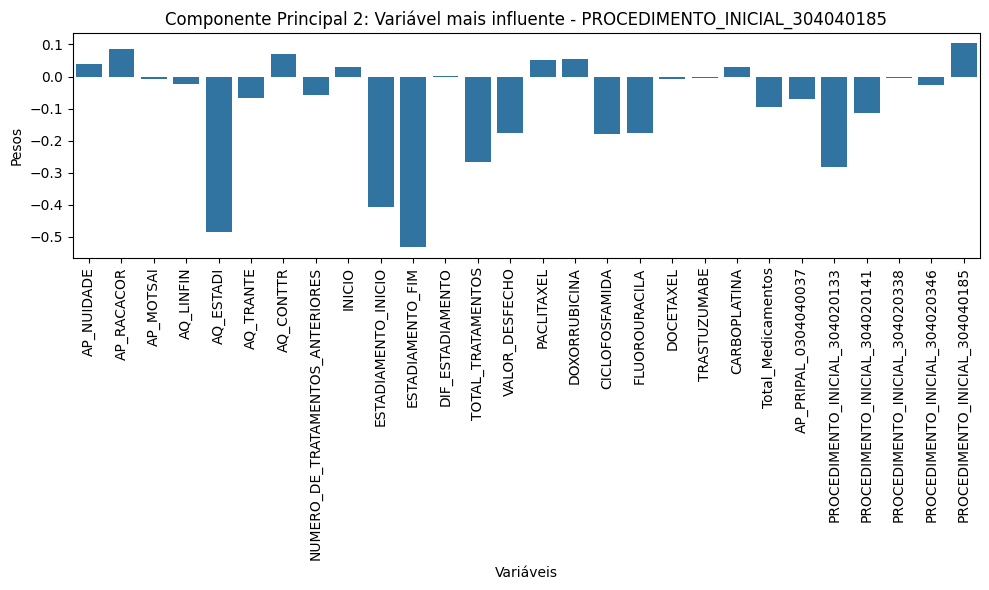

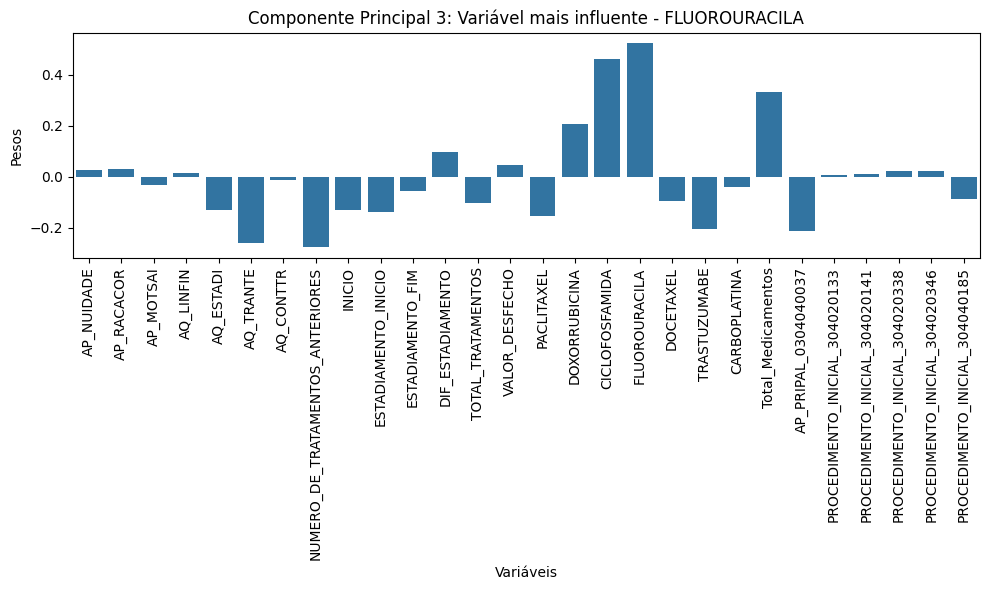

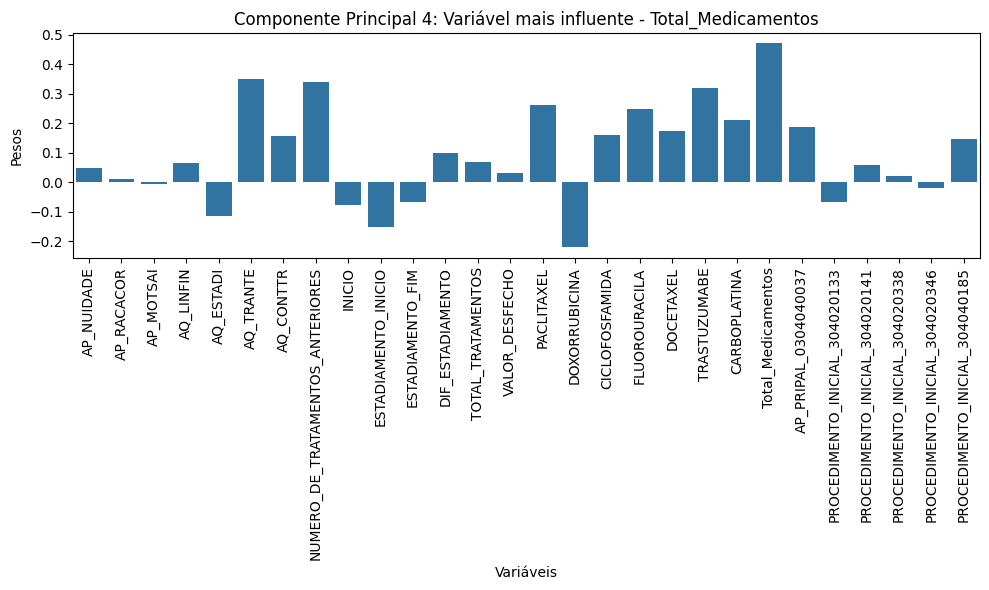

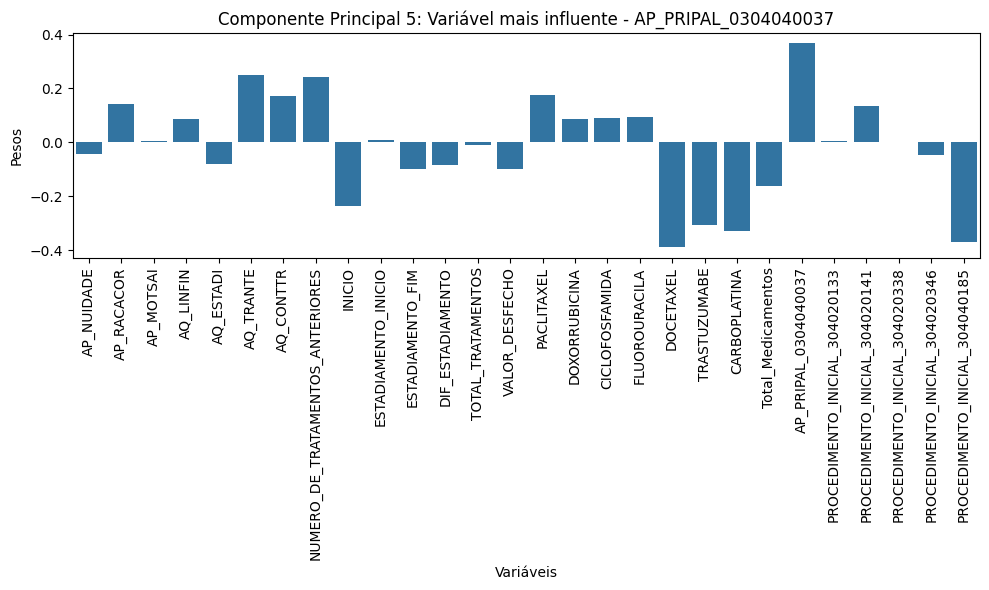

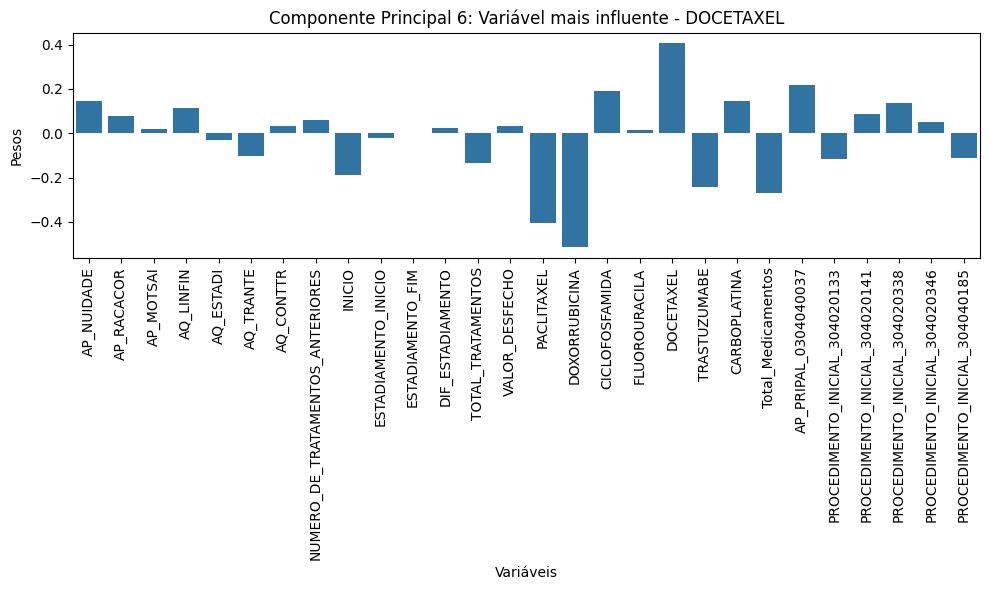

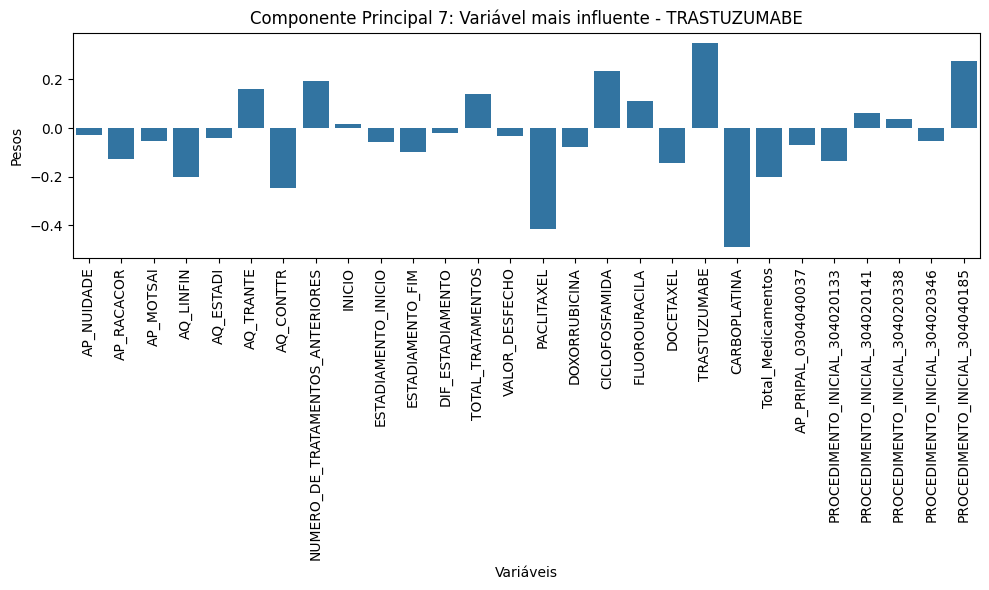

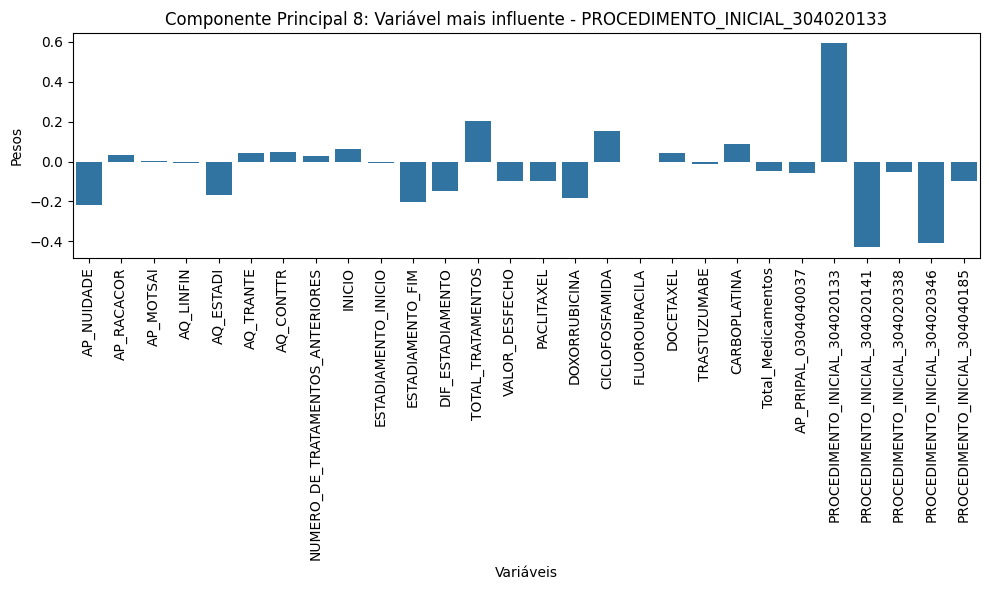

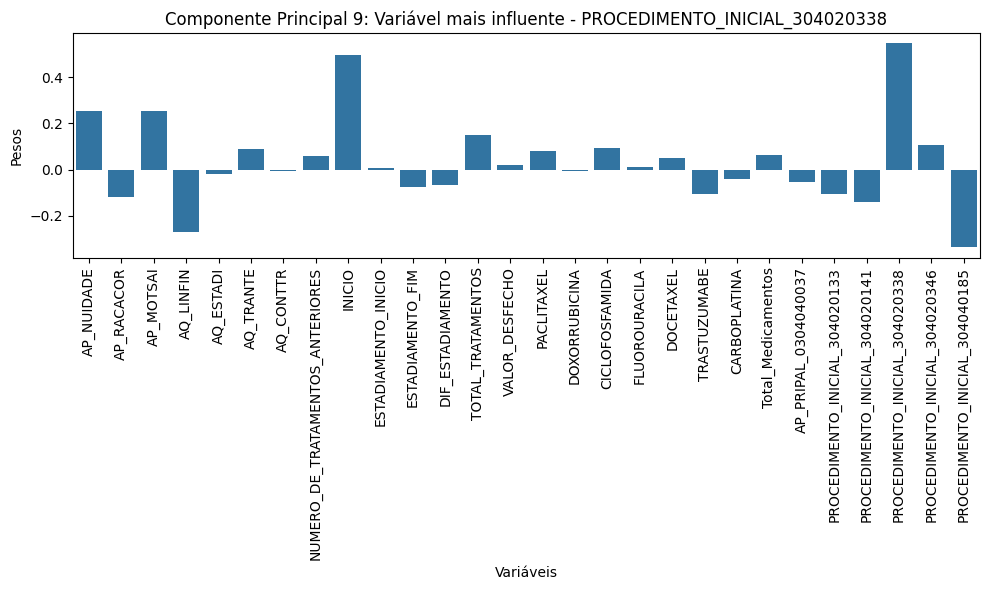

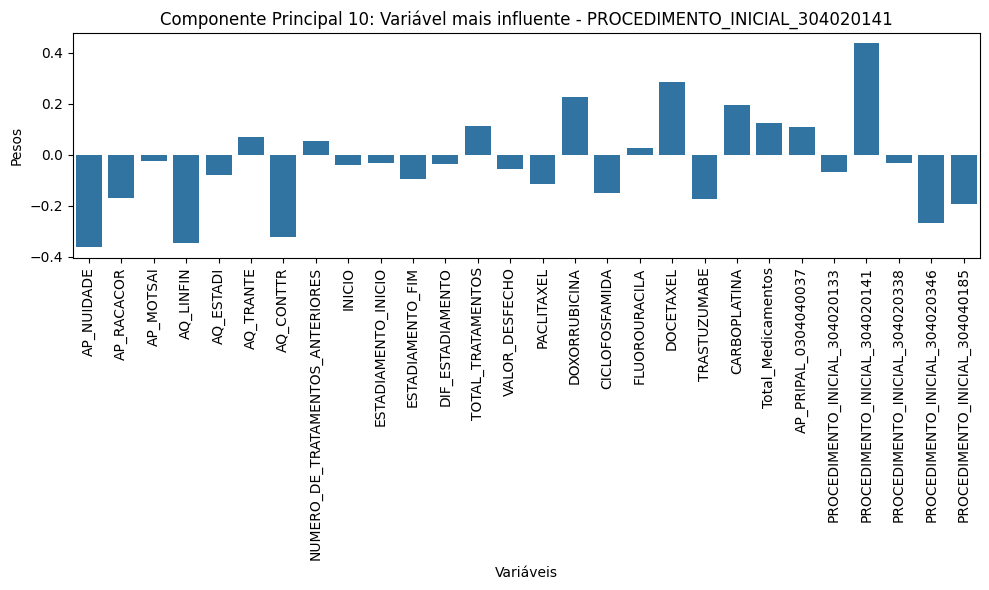

In [255]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Antes de normalizar, salve os nomes das colunas originais
column_names = df_cleaned.columns

# Normalizando os dados (PCA é sensível à escala dos dados)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cleaned)  # df_scaled agora é um numpy.ndarray, sem colunas

# Aplicar PCA
pca = PCA(n_components=10)  # Reduzindo para 10 componentes principais (ajuste conforme necessário)
df_pca = pca.fit_transform(df_scaled)

# Visualizar a variância explicada por cada componente
print(f'Variância explicada por cada componente: {pca.explained_variance_ratio_}')
print(f'Total de variância explicada: {sum(pca.explained_variance_ratio_)}')

# Converter os componentes principais para um DataFrame
componentes_df = pd.DataFrame(pca.components_, columns=column_names)

# Gráficos de barras para os pesos dos componentes principais
plt.figure(figsize=(12, 8))

# Plotando gráfico de barras individualmente para cada componente
for i in range(componentes_df.shape[0]):
    plt.figure(figsize=(10, 6))  # Tamanho individual para cada gráfico
    barplot = sns.barplot(x=componentes_df.columns, y=componentes_df.iloc[i])  # Remover palette

    # Identificar o nome da variável com o maior peso no componente
    max_weight_col = componentes_df.iloc[i].idxmax()  # Corrigido para usar .idxmax() diretamente na Série

    # Usando o nome da coluna com maior peso como título
    plt.title(f'Componente Principal {i+1}: Variável mais influente - {max_weight_col}')
    
    plt.xticks(rotation=90)  # Rotaciona os rótulos para melhor leitura
    plt.xlabel('Variáveis')
    plt.ylabel('Pesos')


    plt.tight_layout()  # Ajusta para que o gráfico não sobreponha os rótulos
    plt.show()


**Elbow method - Encontrando o Número de Clusters**

c:\Users\Rafaela\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Rafaela\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Rafaela\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Rafaela\AppData\Local\Programs\Python\Python311\Lib\site-packages\skle

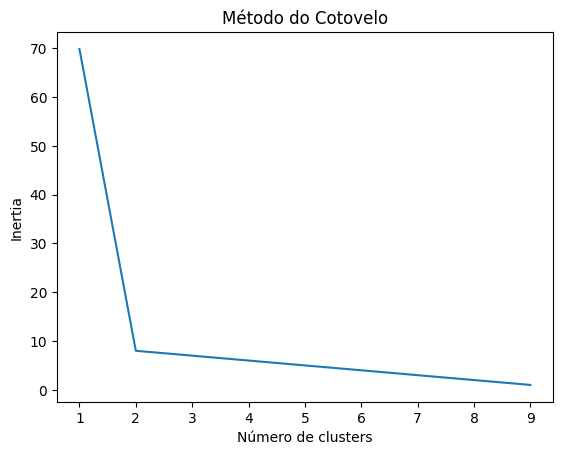

In [257]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


data = componentes_df 

sse = {}  # Dicionário para armazenar a Inertia para cada número de clusters
for k in range(1, 10):  # Testando de 1 a 9 clusters
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=42).fit(data)
    data["clusters"] = kmeans.labels_  # Adiciona a coluna de clusters ao DataFrame
    sse[k] = kmeans.inertia_  # Inertia: Soma das distâncias das amostras para o centro do cluster mais próximo

# Plotando o gráfico para o Método do Cotovelo
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Número de clusters")
plt.ylabel("Inertia")
plt.title("Método do Cotovelo")
plt.show()


c:\Users\Rafaela\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Centróides dos clusters:
   AP_NUIDADE  AP_RACACOR  AP_MOTSAI  AQ_LINFIN  AQ_ESTADI  AQ_TRANTE  \
0   -0.015779   -0.029356   0.028241  -0.115302  -0.136023   0.142577   
1   -0.025374    0.069977  -0.016382   0.013147  -0.135942  -0.085800   

   AQ_CONTTR  NUMERO_DE_TRATAMENTOS_ANTERIORES    INICIO  ESTADIAMENTO_INICIO  \
0  -0.028948                          0.138621  0.031296            -0.105398   
1   0.038448                         -0.050427 -0.046823            -0.144809   

   ESTADIAMENTO_FIM  DIF_ESTADIAMENTO  TOTAL_TRATAMENTOS  VALOR_DESFECHO  \
0         -0.161687         -0.016909           0.032573       -0.052522   
1         -0.018396          0.130188           0.067621        0.109343   

   PACLITAXEL  DOXORRUBICINA  CICLOFOSFAMIDA  FLUOROURACILA  DOCETAXEL  \
0    0.007145       0.009855        0.041444       0.052716  -0.005727   
1   -0.170345      -0.121833        0.179130       0.109676   0.077422   

   TRASTUZUMABE  CARBOPLATINA  Total_Medicamentos  AP_PRIP

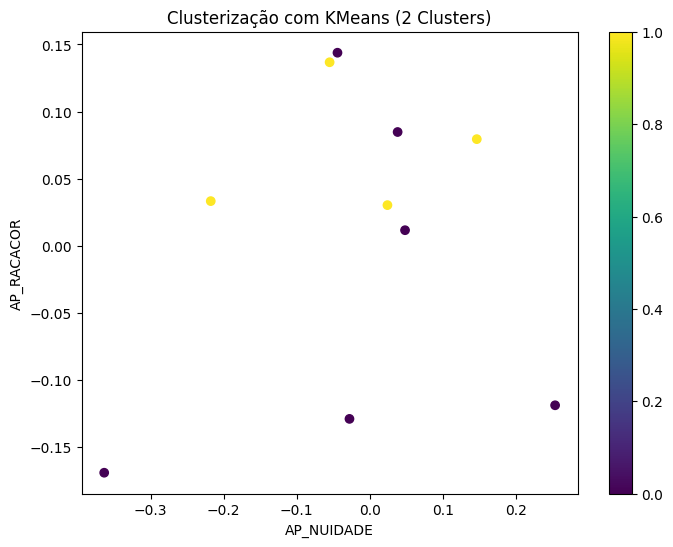

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Usando seu DataFrame componentes_df
data = componentes_df 

# Rodar o KMeans para 2 clusters
kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=42).fit(data)

# Adicionar a coluna 'clusters' no DataFrame com os rótulos dos clusters
data['clusters'] = kmeans.labels_

# Exibindo os centróides de cada cluster
centroids = kmeans.cluster_centers_
centroids_df = pd.DataFrame(centroids, columns=data.columns)

print("\nCentróides dos clusters:")
print(centroids_df)

# Visualizando as amostras de cada cluster
for i in range(2):
    print(f"\nAmostras do Cluster {i}:")
    print(data[data['clusters'] == i].head())  # Mostrando as primeiras amostras de cada cluster

# Visualizando o gráfico de dispersão para as duas primeiras variáveis
plt.figure(figsize=(8,6))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=data['clusters'], cmap='viridis')
plt.title('Clusterização com KMeans (2 Clusters)')
plt.xlabel(data.columns[0])
plt.ylabel(data.columns[1])
plt.colorbar()
plt.show()
